# MACHINE LEARNING - LIDANDO COM DADOS DE MUITAS DIMENSÕES

In [54]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, RFECV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA


In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

resultado_exames = pd.read_csv(url)
resultado_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [3]:
# Qt da valores nulos por coluna
resultado_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [4]:
# removendo os valores faltantes da coluna 'exame_33'
valores_exames_v1 = resultado_exames.drop(columns='exame_33')

In [5]:
valores_exames_v1

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


In [6]:
# Determinando SEED
SEED = 123143
random.seed(SEED)

#Criando variavel de valores
valores_exames = valores_exames_v1.drop(columns=['id', 'diagnostico'])
diagnostico = resultado_exames.diagnostico

#separando entre treino e teste

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico,
                                                       test_size = 0.3)

In [7]:
# Random Forest
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

score = classificador.score(teste_x, teste_y)

print('Acurácia: {} '.format(score * 100))

Acurácia: 92.39766081871345 


In [8]:
#classificador dummy

SEED = 123143
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy='most_frequent')
classificador_dummy.fit(treino_x, treino_y)

score_dummy = classificador_dummy.score(teste_x, teste_y)

print('Acurácia Dummy Classifier: {}'.format(score_dummy * 100))

Acurácia Dummy Classifier: 66.66666666666666


## ESTUDO DO COMPORTAMENTO DAS VARIÁVEIS

***

Classe B ou M x Exames - Quais são os resultados do exame_01 que resultam em M ou B (e assim para os demais exames)

In [9]:
dados_plot = pd.concat([diagnostico, valores_exames.iloc[:, 0:10]], axis = 1)
dados_plot

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397


In [10]:
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.9900
1,M,exame_1,20.5700
2,M,exame_1,19.6900
3,M,exame_1,11.4200
4,M,exame_1,20.2900
...,...,...,...
5685,M,exame_10,0.1726
5686,M,exame_10,0.1752
5687,M,exame_10,0.1590
5688,M,exame_10,0.2397


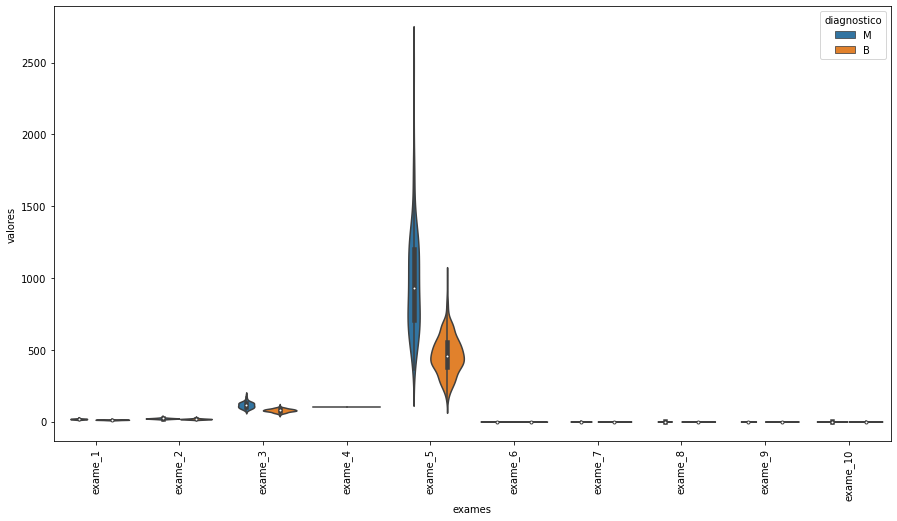

In [11]:
plt.figure(figsize=(15, 8))
sns.violinplot(x = 'exames', y='valores', hue='diagnostico', data = dados_plot)

plt.xticks(rotation = 90);

### Padronizando as escalas

In [12]:
padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_v2 = padronizador.transform(valores_exames)

#transformando em um dataframe
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames.keys())

valores_exames_v2

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.0,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.0,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.0,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.0,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.0,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.0,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.0,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.0,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.0,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.0,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,1.0,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.0,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.0,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.0,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,1.0,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.0,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.0,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.0,2.289985,1.919083,2.219635


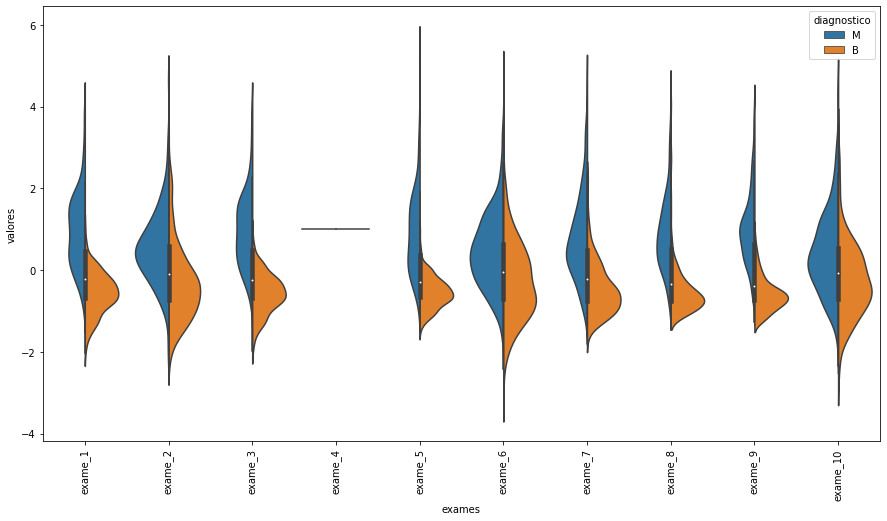

In [13]:
#plotando o grafico de violino

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:, 0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(15, 8))
sns.violinplot(x = 'exames', y='valores', hue='diagnostico', data = dados_plot, split=True)

plt.xticks(rotation = 90);

In [14]:
# Analisando exame 04

valores_exames_v2.exame_4 #valores constantes

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

### Plotando todas as variáveis

In [15]:
def grafico_violino(valores, inicio, fim):
    
    dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(15, 8))
    sns.violinplot(x = 'exames', y='valores', hue='diagnostico', data = dados_plot, split=True)

    plt.xticks(rotation = 90);

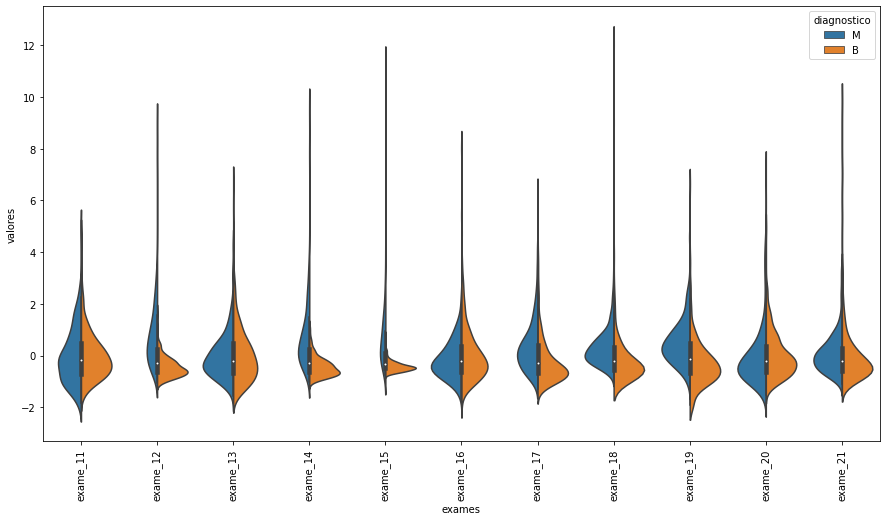

In [16]:
grafico_violino(valores_exames_v2, 10, 21)

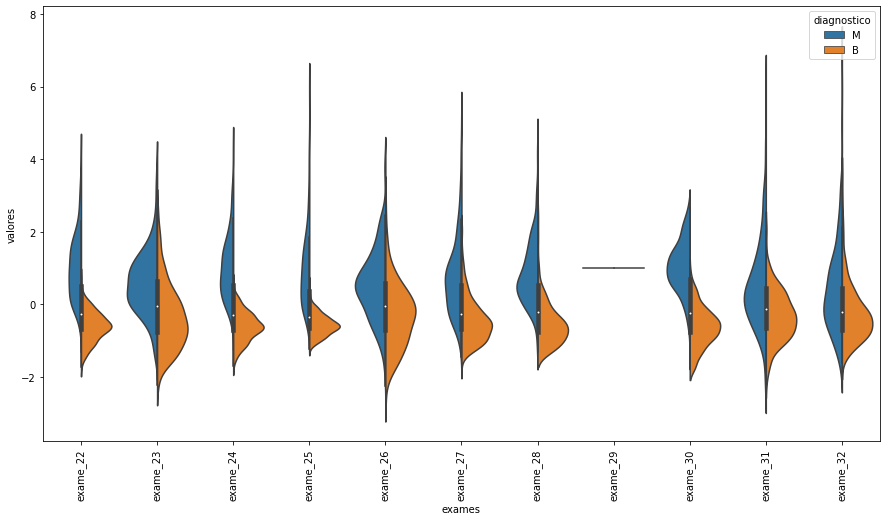

In [17]:
grafico_violino(valores_exames_v2, 21, 32)

In [18]:
#removendo as variaveis com valores constantes

valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])

## Treinando o modelo após excluir as variaveis constantes

In [26]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico,
                                                       test_size = 0.3)
    
    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)

    score = classificador.score(teste_x, teste_y)
    print('Acurácia: {}'.format(score * 100))

In [27]:
classificar(valores_exames_v3)

Acurácia: 92.98245614035088


# Correlação

In [28]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

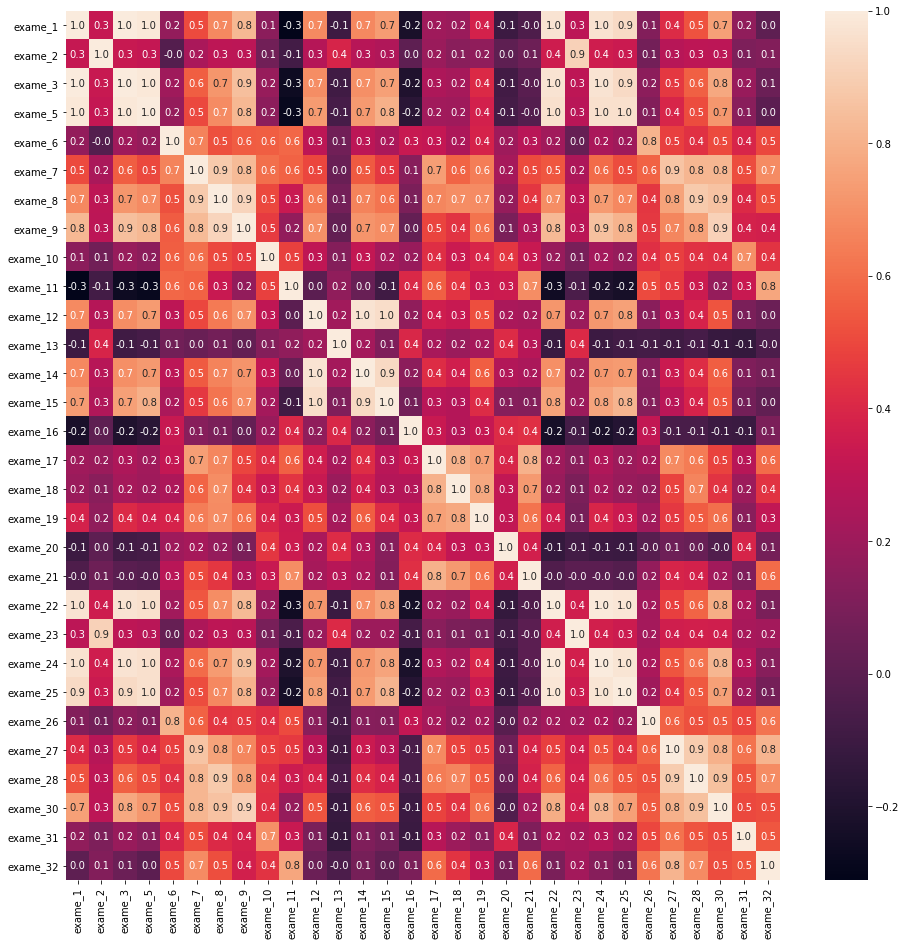

In [29]:
matriz = valores_exames_v3.corr()

plt.figure(figsize=(16,16))
sns.heatmap(matriz, annot=True, fmt='.1f')

In [30]:
#correlacao > que 0.99
matriz_01 = matriz[matriz > 0.99]

matriz_02 = matriz_01.sum()

matriz_02

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [31]:
variaveis_corr = matriz_02[matriz_02 > 1]
variaveis_corr 

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [32]:
# excluindo
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_corr.keys())
valores_exames_v4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## VERIFICANDO A ACURÁCIA

In [33]:
classificar(valores_exames_v4)

Acurácia: 91.81286549707602


In [34]:
# adicionando novamente as variaveis
valores_exames_v5 = valores_exames_v3.drop(columns=(['exame_3', 'exame_24']))

# verificando a acurácia
classificar(valores_exames_v5)

Acurácia: 92.98245614035088


# SELEÇÃO DAS TOP x MELHORES FEATURES

In [35]:
selecionar_kmelhores = SelectKBest(chi2, k =5)

In [36]:
valores_exames_v6 = valores_exames.drop(columns=(['exame_4', 'exame_29', 'exame_3', 'exame_24']))

In [37]:
#Separando em dados de treino e teste
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico,
                                                       test_size = 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [38]:
treino_kbest.shape

(398, 5)

In [39]:
teste_kbest.shape

(171, 5)

In [40]:
#treinando novamente
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

score = classificador.score(teste_kbest, teste_y)

print('Acurácia: {} '.format(score * 100))

Acurácia: 92.39766081871345 


#  MATRIZ DE CONFUSÃO

In [41]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, 25.5, 'Predicao'), Text(43.5, 0.5, 'real')]

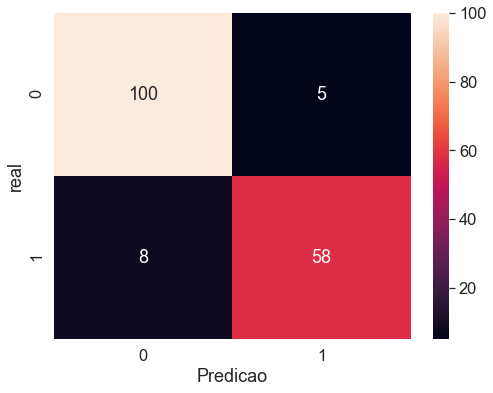

In [42]:
# visualizando a matriz de confusao
plt.figure(figsize=(8,6))

sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot=True, fmt = 'd').set(xlabel = 'Predicao', ylabel = 'real')

In [43]:
teste_y.value_counts()

B    105
M     66
Name: diagnostico, dtype: int64

# SELEÇÃO - RFE

Acurácia: 92.39766081871345 
Acurácia: 90.05847953216374 


[Text(0.5, 25.5, 'Predicao'), Text(43.5, 0.5, 'real')]

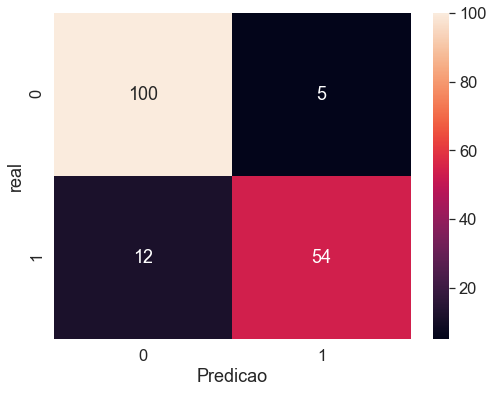

In [44]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

score = classificador.score(teste_kbest, teste_y)

print('Acurácia: {} '.format(score * 100))


rfe = RFE(estimator= classificador, n_features_to_select = 5, step = 5)
rfe.fit(treino_x, treino_y)
treino_rfe = rfe.transform(treino_x)
teste_rfe = rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

#matriz de confusao
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

score = classificador.score(teste_rfe, teste_y)
print('Acurácia: {} '.format(score * 100))

# visualizando a matriz de confusao
plt.figure(figsize=(8,6))

sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot=True, fmt = 'd').set(xlabel = 'Predicao', ylabel = 'real')

# CROSS-VALIDATION

Acurácia: 92.39766081871345 
Acurácia: 92.98245614035088 


[Text(0.5, 25.5, 'Predicao'), Text(43.5, 0.5, 'real')]

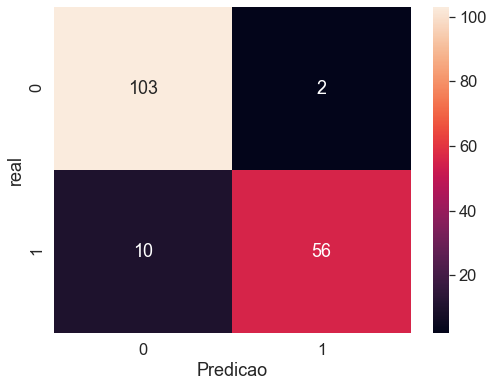

In [47]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

score = classificador.score(teste_kbest, teste_y)

print('Acurácia: {} '.format(score * 100))


rfecv = RFECV(estimator= classificador, cv = 5, step = 1, scoring='accuracy')
rfecv.fit(treino_x, treino_y)

treino_rfecv = rfecv.transform(treino_x)
teste_rfecv = rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

#matriz de confusao
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

score = classificador.score(teste_rfecv, teste_y)
print('Acurácia: {} '.format(score * 100))

# visualizando a matriz de confusao
plt.figure(figsize=(8,6))

sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot=True, fmt = 'd').set(xlabel = 'Predicao', ylabel = 'real')

In [48]:
# quantidade de features
rfecv.n_features_

26

In [49]:
# visualizando quais features
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [50]:
# nome das colunas
treino_x.columns[rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [51]:
#score de cada feature
rfecv.grid_scores_

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

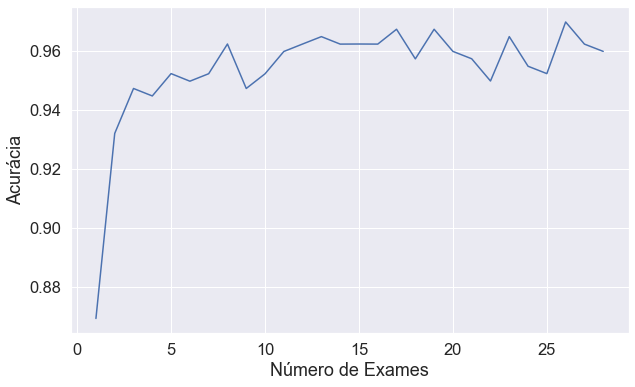

In [53]:
# visualizando a acuracia de acordo com a qt. de features

plt.figure(figsize=(10,6))
plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')

plt.plot(range(1, len(rfecv.grid_scores_) +1), rfecv.grid_scores_)

# PCA

In [56]:
pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5) #v5 == dados normalizados
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

<AxesSubplot:>

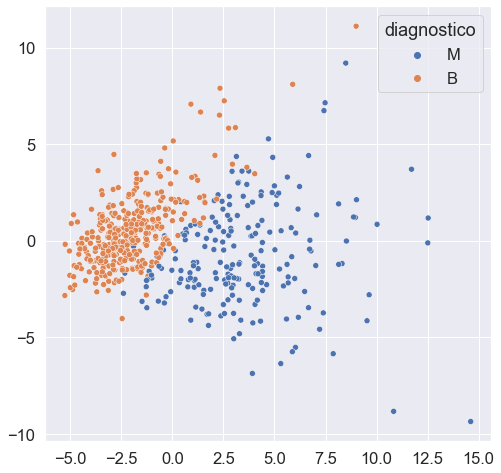

In [59]:
# plotando
plt.figure(figsize=(8,8))
sns.scatterplot(x=valores_exames_v8[:, 0], y=valores_exames_v8[:, 1], hue= diagnostico)